In [62]:
from __future__ import print_function, division
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
import scipy.stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from numpy import inf

%matplotlib inline
import requests

import io
import os
import zipfile

In [63]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/1Gx3R244VRahX2Y3IyjQBWsIu7-NtYqK-0qhfswhXNWs/gviz/tq?tqx=out:csv&sheet={sheet_name}')

In [64]:
df.rename(columns = {"Unnamed: 0":"time"},inplace = True)

In [65]:
df["Data"] = pd.to_datetime(df.time)
df["hour"] = df["Data"].apply(lambda x: x.hour)
df["tmp"] = df["Temp."].apply(lambda x: float(x.split("°")[0]))
df["humid"] = df["Unnamed: 4"].apply(lambda x: float(x.split("%")[0]))

In [66]:
df_plot = df[["hour", "tmp", "humid"]]

In [67]:
df.columns

Index(['time', 'Temp.', 'Windchill', 'Dew Point', 'Unnamed: 4', 'Pressure',
       'Visibility', 'Wind Dir', 'Wind Speed', 'Gust Speed', 'Precip',
       'Events', 'Conditions', 'Data', 'hour', 'tmp', 'humid'],
      dtype='object')

In [68]:
df_plot

,hour,tmp,humid
0,0,33.1,54.0
1,1,33.1,52.0
2,2,32.0,54.0
3,3,32.0,54.0
4,4,32.0,56.0
5,5,32.0,54.0
6,6,32.0,52.0
7,7,32.0,52.0
8,8,34.0,52.0
9,9,35.1,50.0


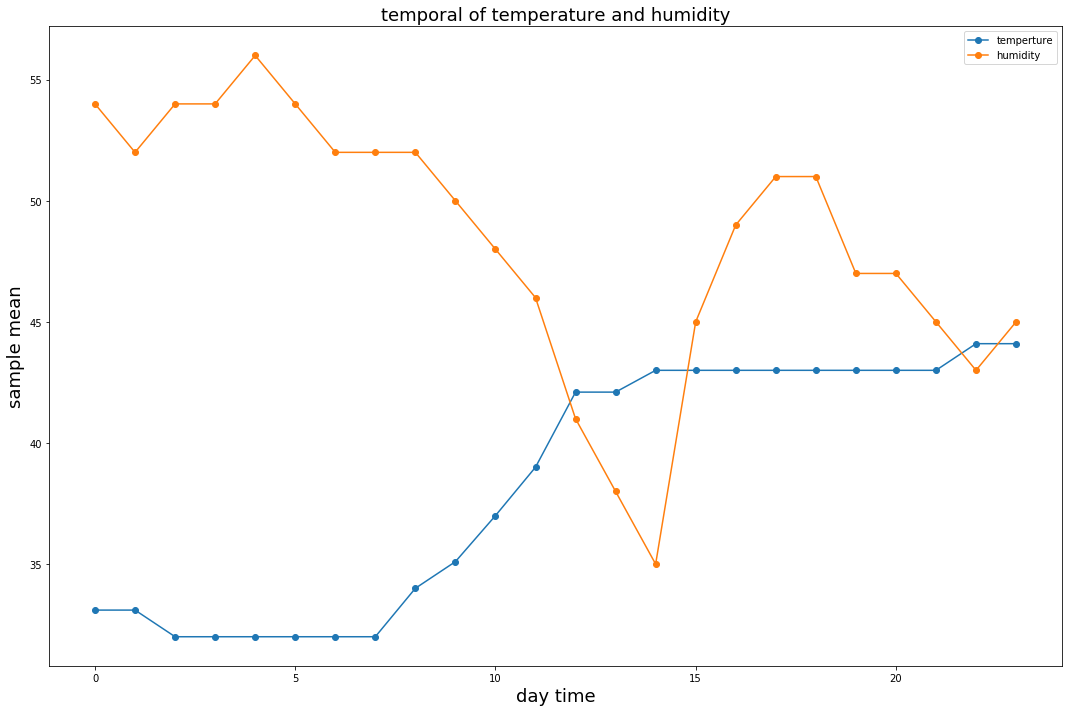

In [70]:
fig = pl.figure(figsize=(15,10))
i = 1
dis_titles = ['tmp', 'humid']
#for dist in dis_titles:
    #print(dist)
ax_mu_n = fig.add_subplot(1,1,1)
    
    
ax_mu_n.plot(df_plot["hour"], df['tmp'], '-',label='temperture',marker='o')
ax_mu_n.plot(df_plot["hour"], df['humid'], '-',label='humidity',marker='o')
ax_mu_n.set_xlabel('day time', fontsize=18)
ax_mu_n.set_ylabel('sample mean', fontsize=18)
ax_mu_n.set_title("temporal of temperature and humidity", fontsize=18)
plt.legend()
    #ax_mu_n.plot([0, 2000], [mean_number/10, mean_number/10], 'k')
#    i += 1
plt.tight_layout()
savefig('temporal.png')